In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [177]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [178]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [179]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [182]:
data_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [183]:
print('Survived          : ', data_train.Survived.unique())
print('Passenger Classes : ', data_train.Pclass.unique())
print('Gender            : ', data_train.Sex.unique())
print('Embarked          : ', data_train.Embarked.dropna().unique())

Survived          :  [0 1]
Passenger Classes :  [3 1 2]
Gender            :  ['male' 'female']
Embarked          :  ['S' 'C' 'Q']


In [184]:
data_train.duplicated().sum()

0

In [185]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [186]:
titanic = data_train.drop('Cabin', axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [187]:
avg_age = titanic.Age.mean()
titanic.Age.replace(np.nan, avg_age, inplace = True)

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [188]:
freq_port = titanic.Embarked.dropna().mode()[0]
titanic.Embarked.replace(np.nan, freq_port, inplace = True)

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [189]:
# Creating a new column family_members by adding SibSp and Parch
titanic['family_members'] = titanic.SibSp + titanic.Parch
titanic.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


<Axes: xlabel='Survived', ylabel='count'>

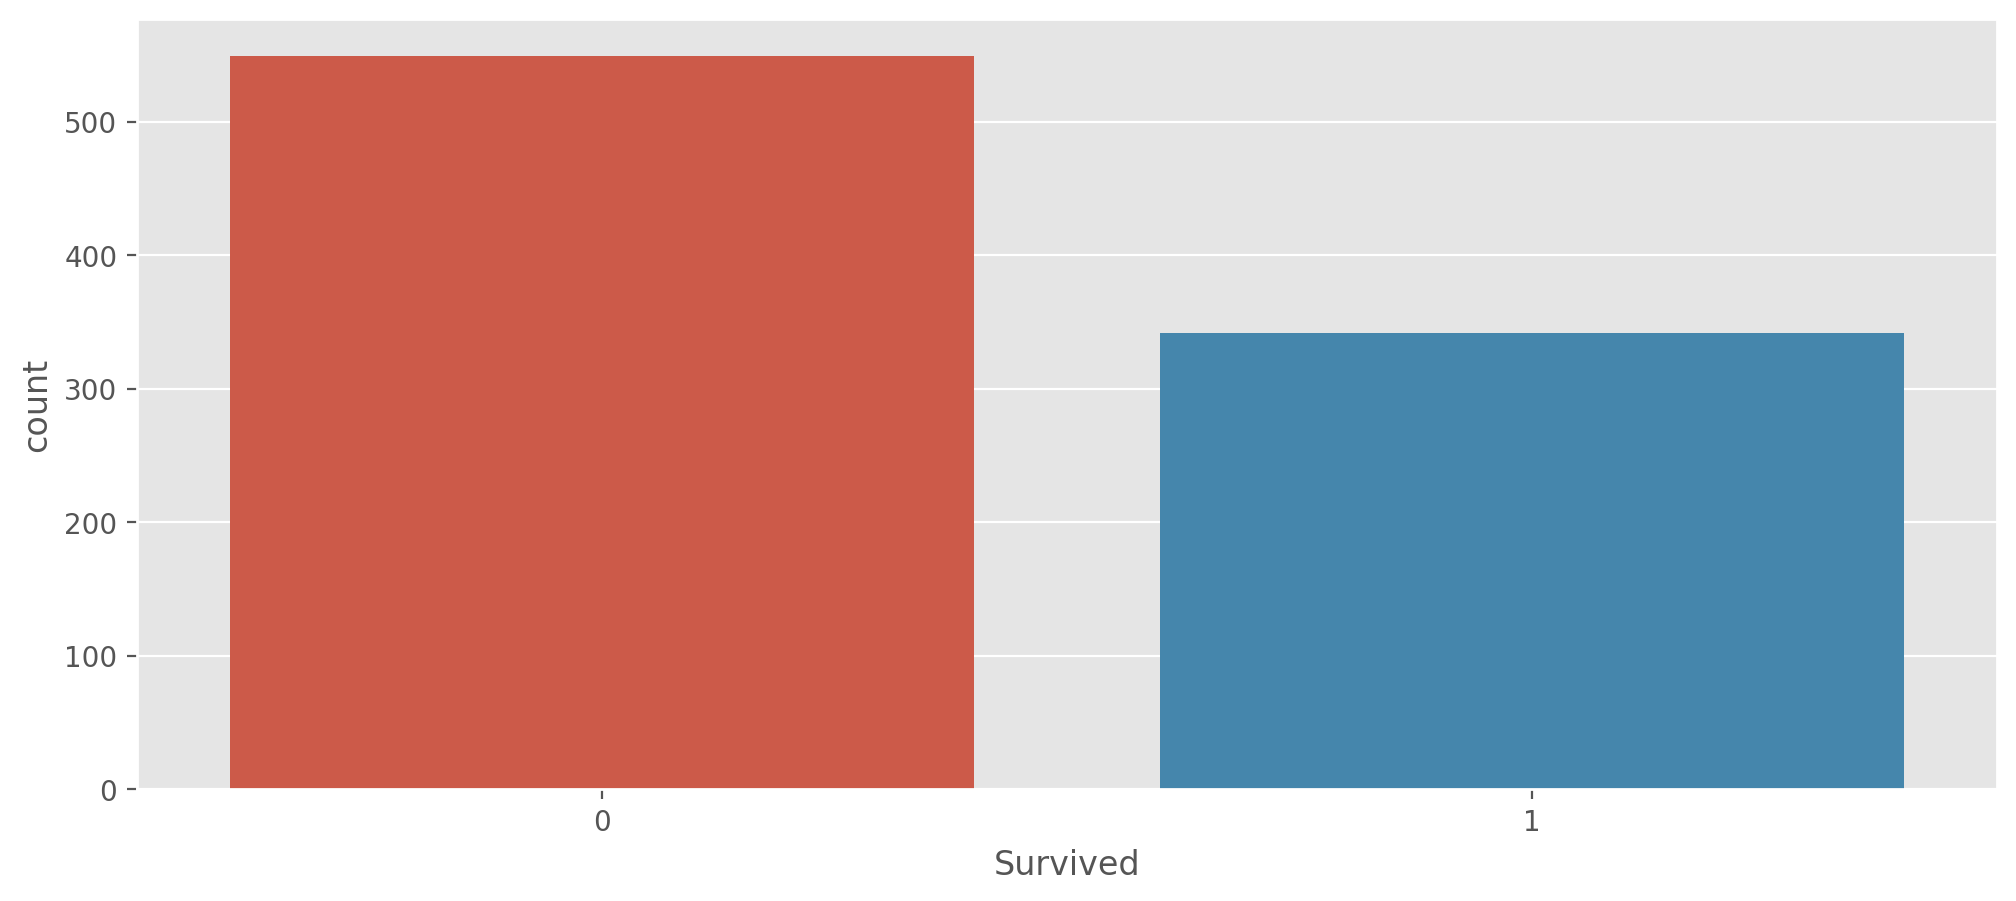

In [190]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Survived', data = titanic)

In [191]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [192]:
survival_ratio = titanic.Survived.value_counts(normalize = True)
print('Percentage of Survivors : ', round(survival_ratio[1] * 100,2) , '%')
print('Percentage of Dead      : ', round(survival_ratio[0] * 100,2) , '%')

Percentage of Survivors :  38.38 %
Percentage of Dead      :  61.62 %


<Axes: xlabel='Survived', ylabel='count'>

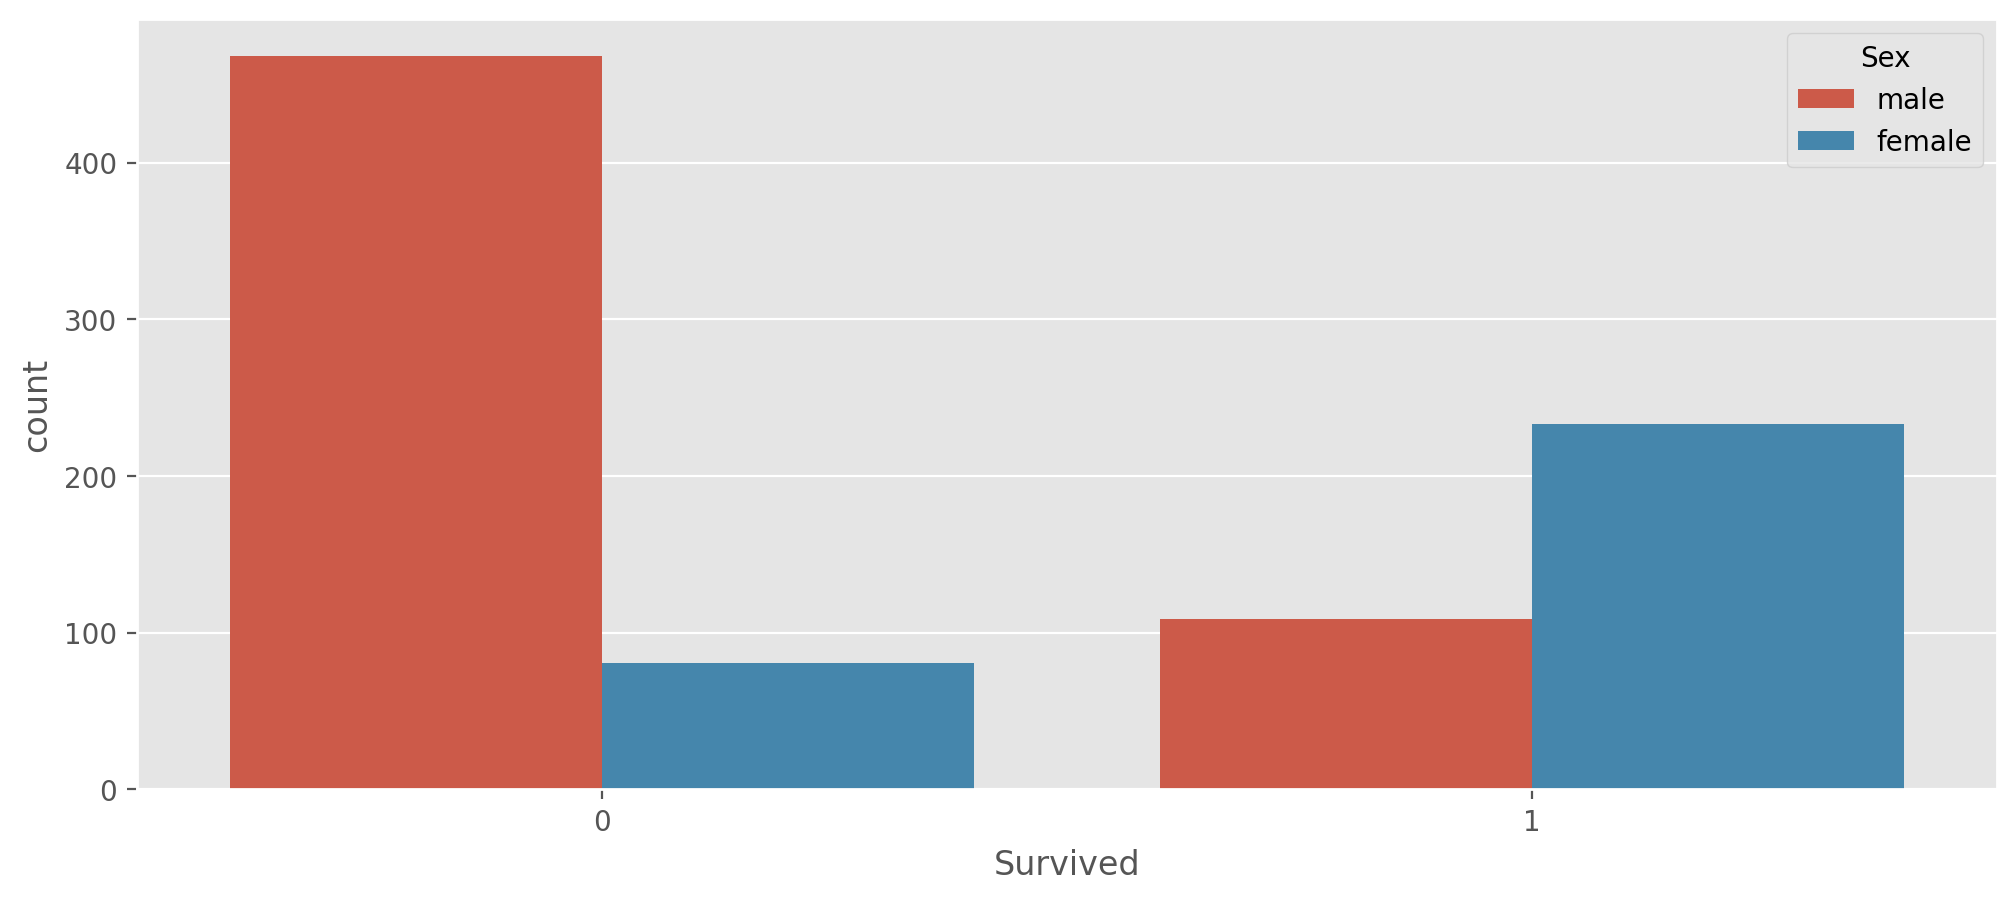

In [193]:
# Comparing Survival with Sex
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Pclass', ylabel='count'>

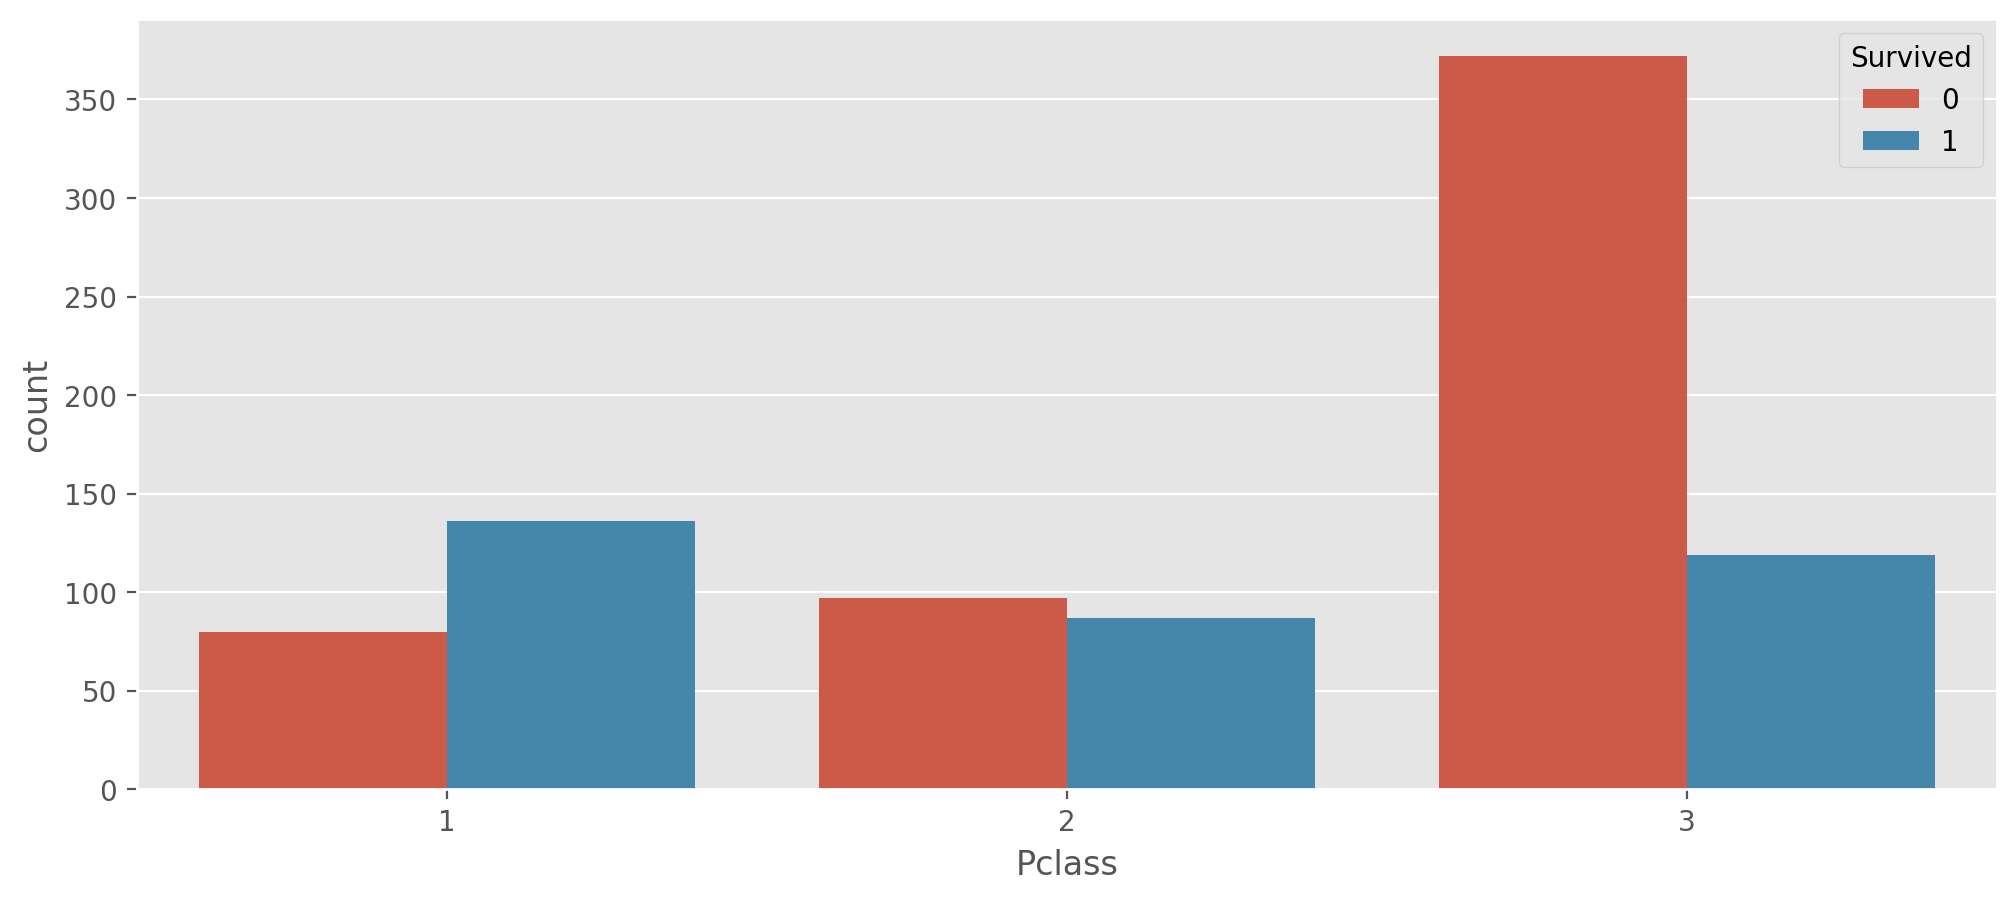

In [194]:
# Survival based on pclass
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)

<ipython-input-195-f276cf240620>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Fare, hist = False)


<Axes: ylabel='Fare'>

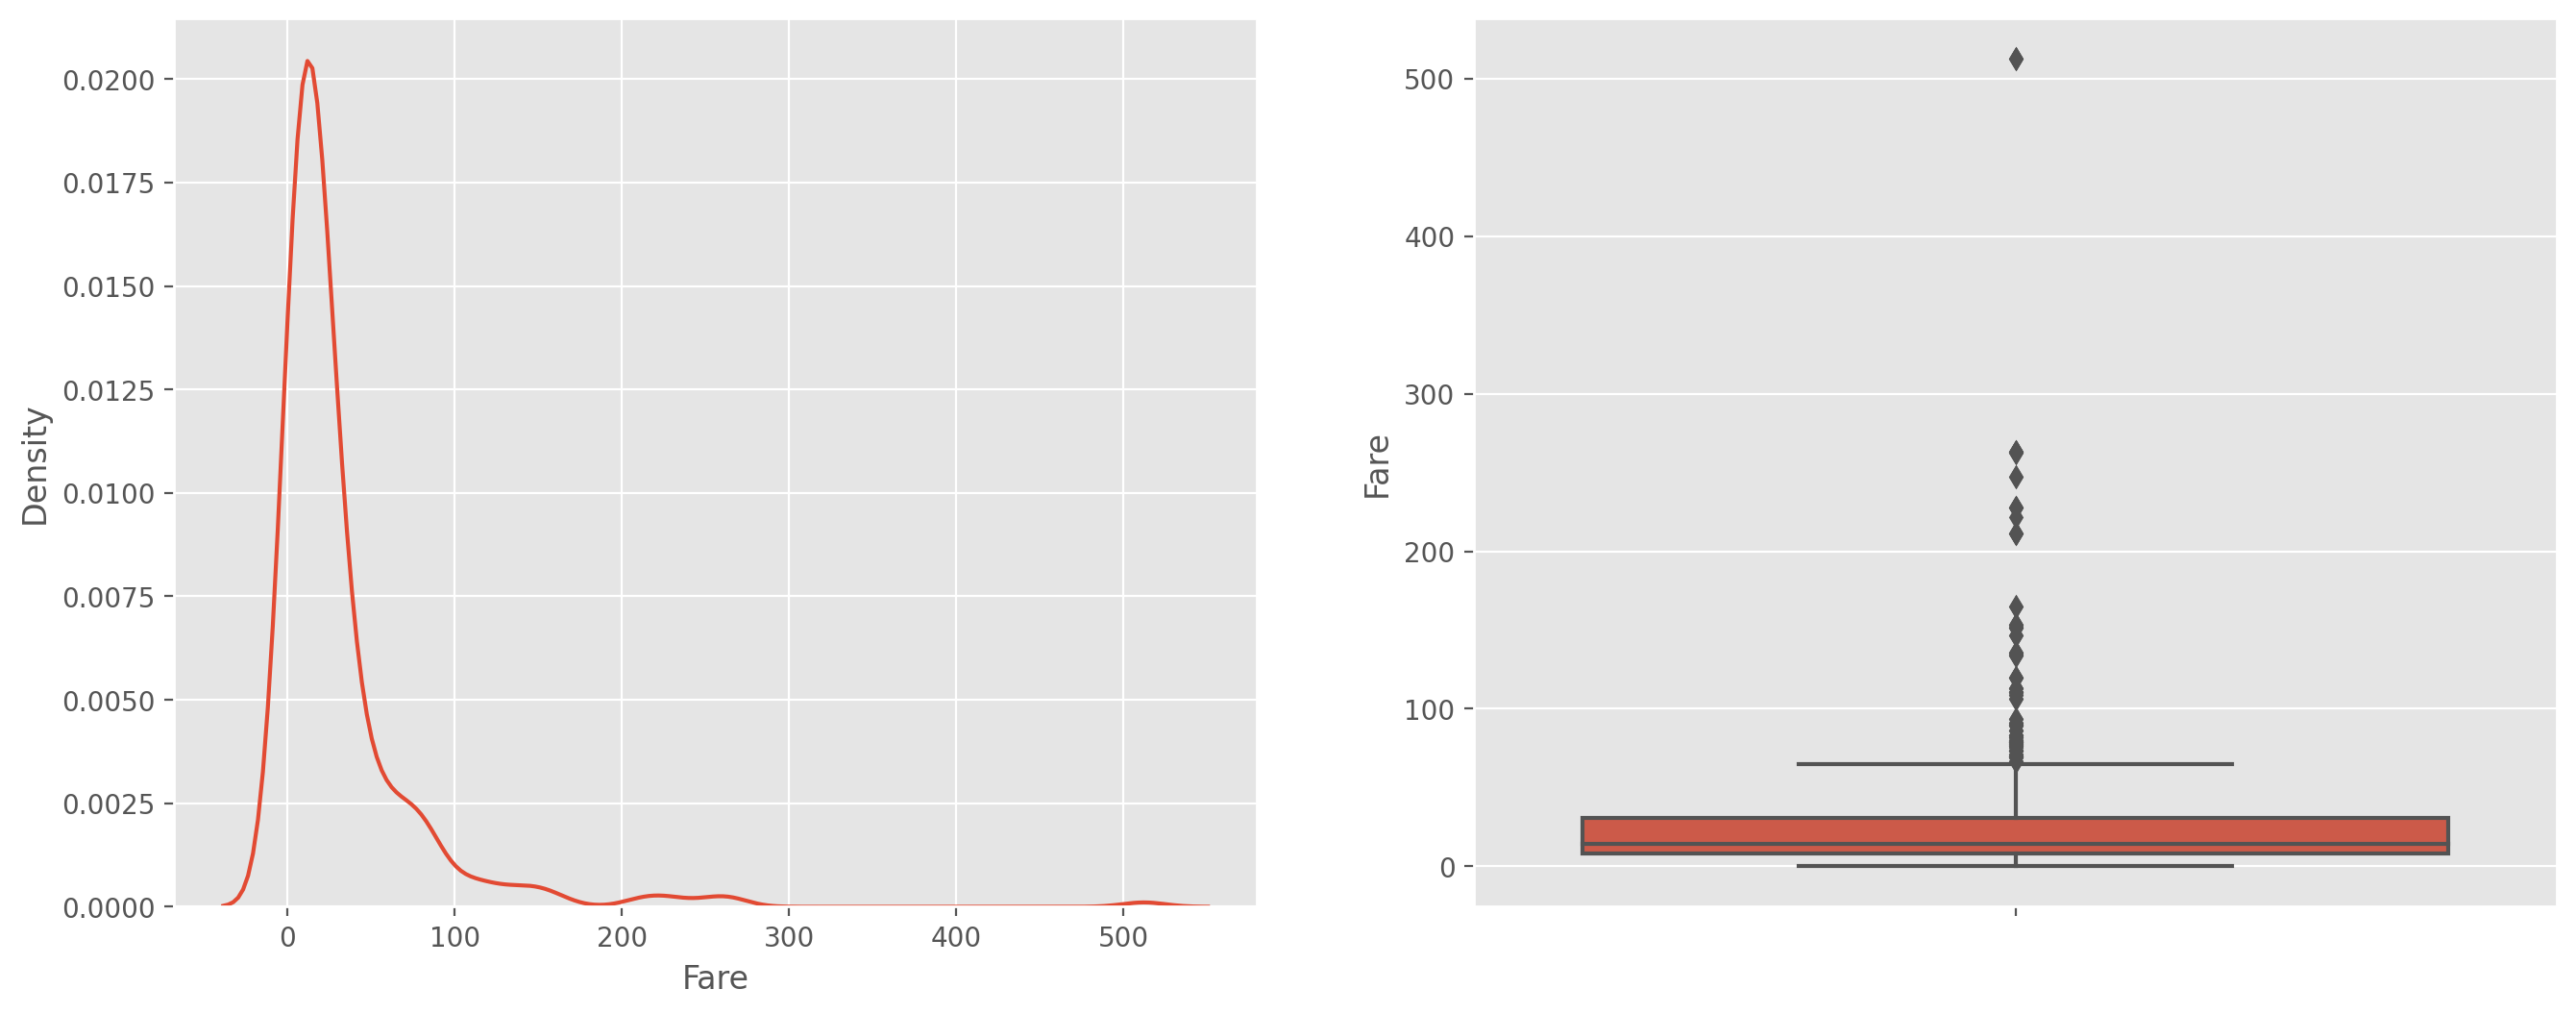

In [195]:
# Analysing fare
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(titanic.Fare, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = 'Fare', data = titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

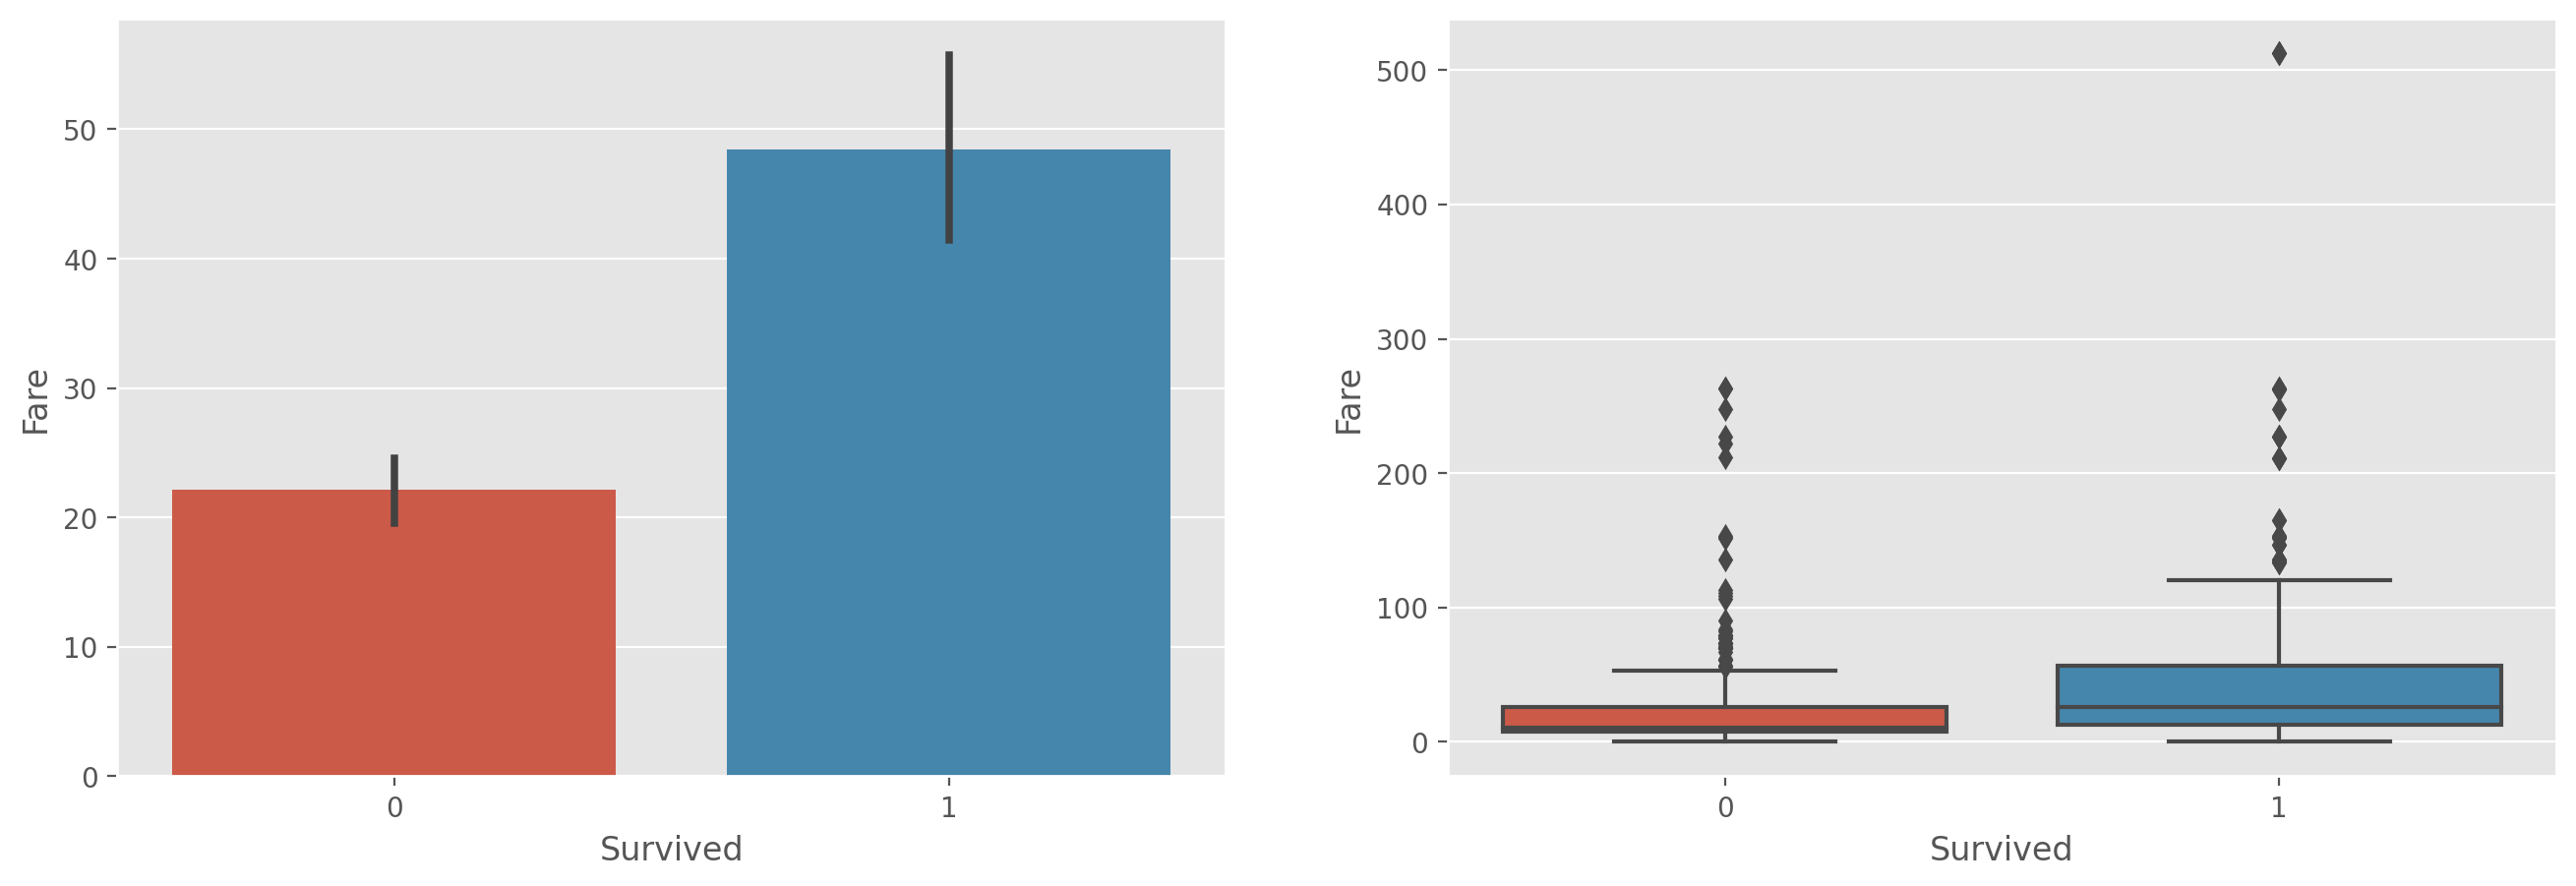

In [196]:
# Analysing fare wrt Pclass
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y= 'Fare', data = titanic)
plt.subplot(1,2,2)
sns.boxplot(x = 'Survived', y= 'Fare', data = titanic)

<Axes: xlabel='family_members', ylabel='count'>

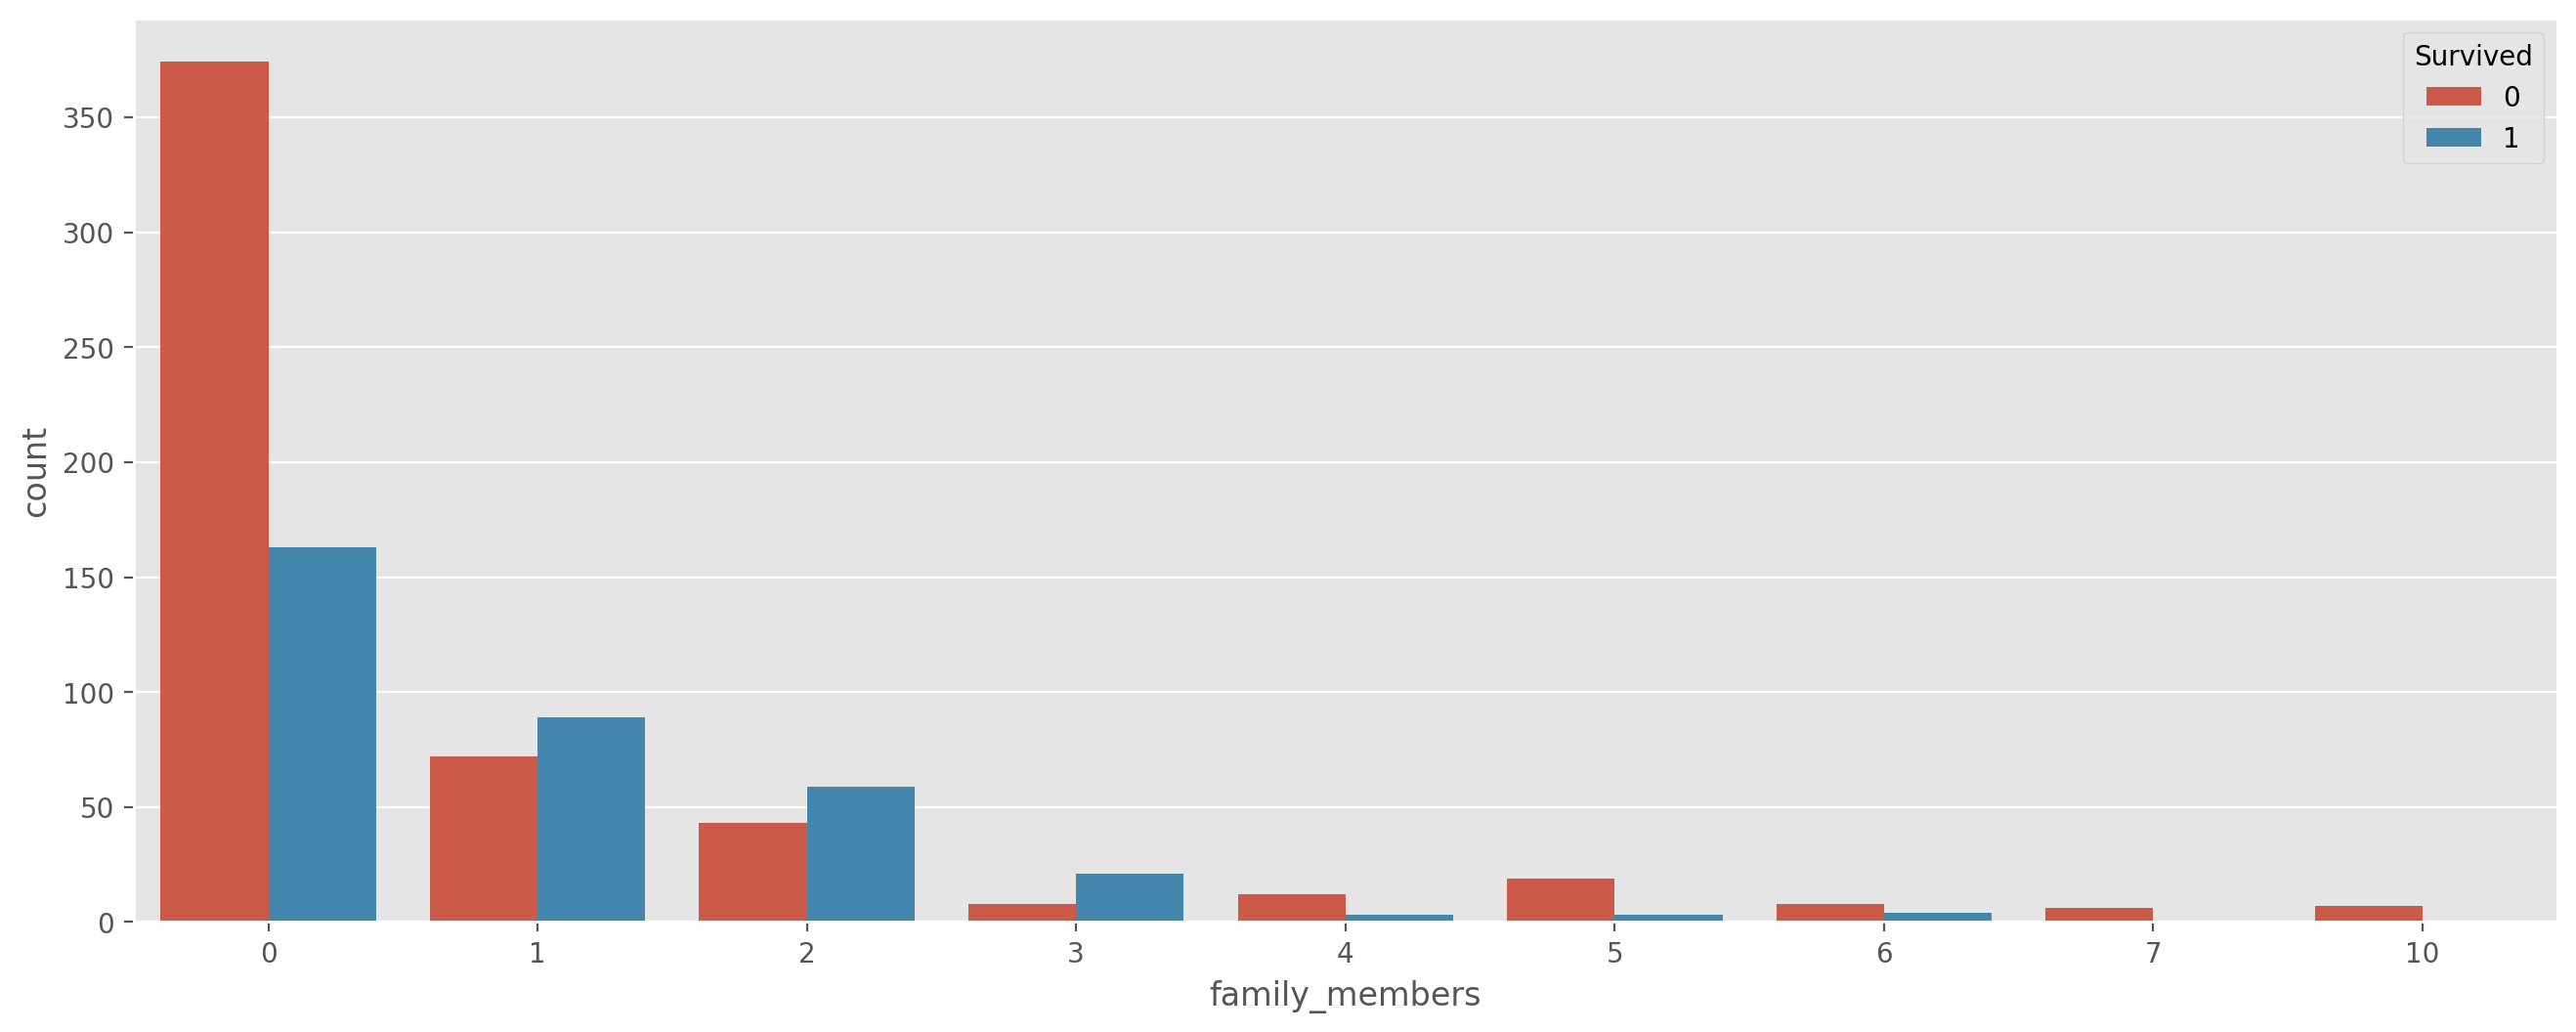

In [197]:
# Comparing family_members with survived
plt.figure(figsize = (16,6), dpi = 200)
sns.countplot(x = 'family_members', hue = 'Survived', data = titanic)

In [198]:
titanic['Sex'] = titanic['Sex'].map({'female' : 0, 'male' : 1})
titanic['Embarked'] = titanic['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0


In [199]:
cols = ['Pclass', 'Sex', 'Embarked', 'Age', 'Fare', 'family_members']
X = titanic[cols].values
Y = titanic[['Survived']].values

In [200]:
print('Independent feature set shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature set shape :  (891, 6)
Dependent feature shape       :  (891, 1)


In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [202]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (712, 6)
Training labels shape :  (712, 1)
Testing data shape    :  (179, 6)
Testing labels shape  :  (179, 1)


In [203]:
y_train = to_categorical(y_train, num_classes = 2)
y_test  = to_categorical(y_test, num_classes = 2)

In [204]:
print('Training data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data Shape   :  (712, 6)
Training labels Shape :  (712, 2)
Testing Data Shape    :  (179, 6)
Testing labels shape  :  (179, 2)


In [219]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (6,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, 'sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 6)                 0         
                                                                 
 dense_30 (Dense)            (None, 200)               1400      
                                                                 
 dense_31 (Dense)            (None, 100)               20100     
                                                                 
 dense_32 (Dense)            (None, 2)                 202       
                                                                 
Total params: 21702 (84.77 KB)
Trainable params: 21702 (84.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [220]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [221]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    # batch_size = 500,
    epochs = 60,
    verbose = 1
)

Epoch 1/60
23/23 [==============================] - 2s 14ms/step - loss: 1.0512 - accuracy: 0.6447 - val_loss: 0.7342 - val_accuracy: 0.6201
Epoch 2/60
23/23 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6742 - val_loss: 0.6722 - val_accuracy: 0.6201
Epoch 3/60
23/23 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6980 - val_loss: 0.6344 - val_accuracy: 0.7095
Epoch 4/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5801 - accuracy: 0.6938 - val_loss: 0.6458 - val_accuracy: 0.6313
Epoch 5/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.6938 - val_loss: 0.6014 - val_accuracy: 0.6983
Epoch 6/60
23/23 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.6952 - val_loss: 0.6079 - val_accuracy: 0.6257
Epoch 7/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5714 - accuracy: 0.7219 - val_loss: 0.5615 - val_accuracy: 0.7374
Epoch 8/60
23/23 [=

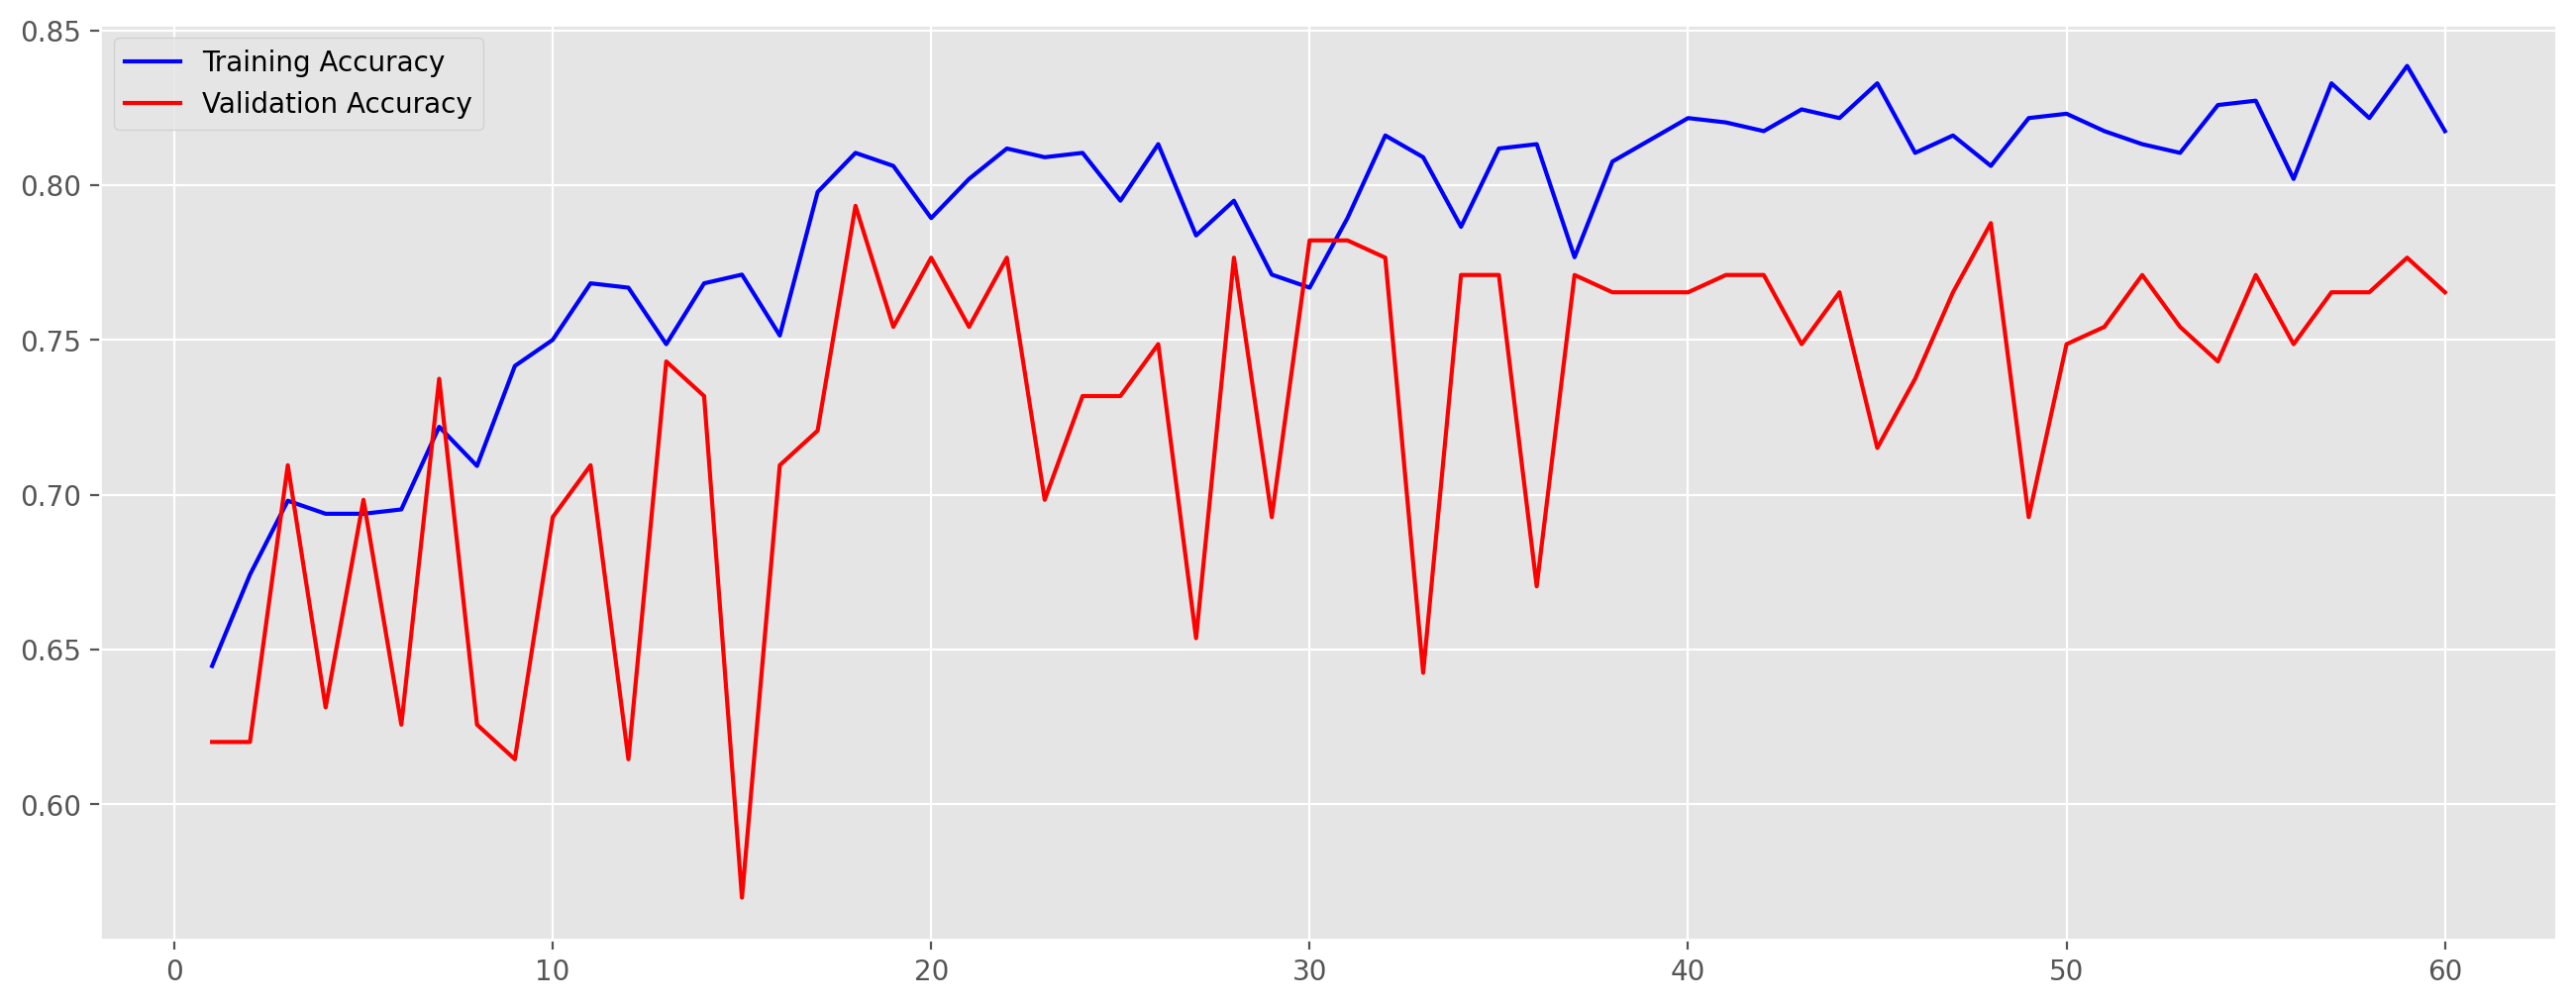

In [223]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

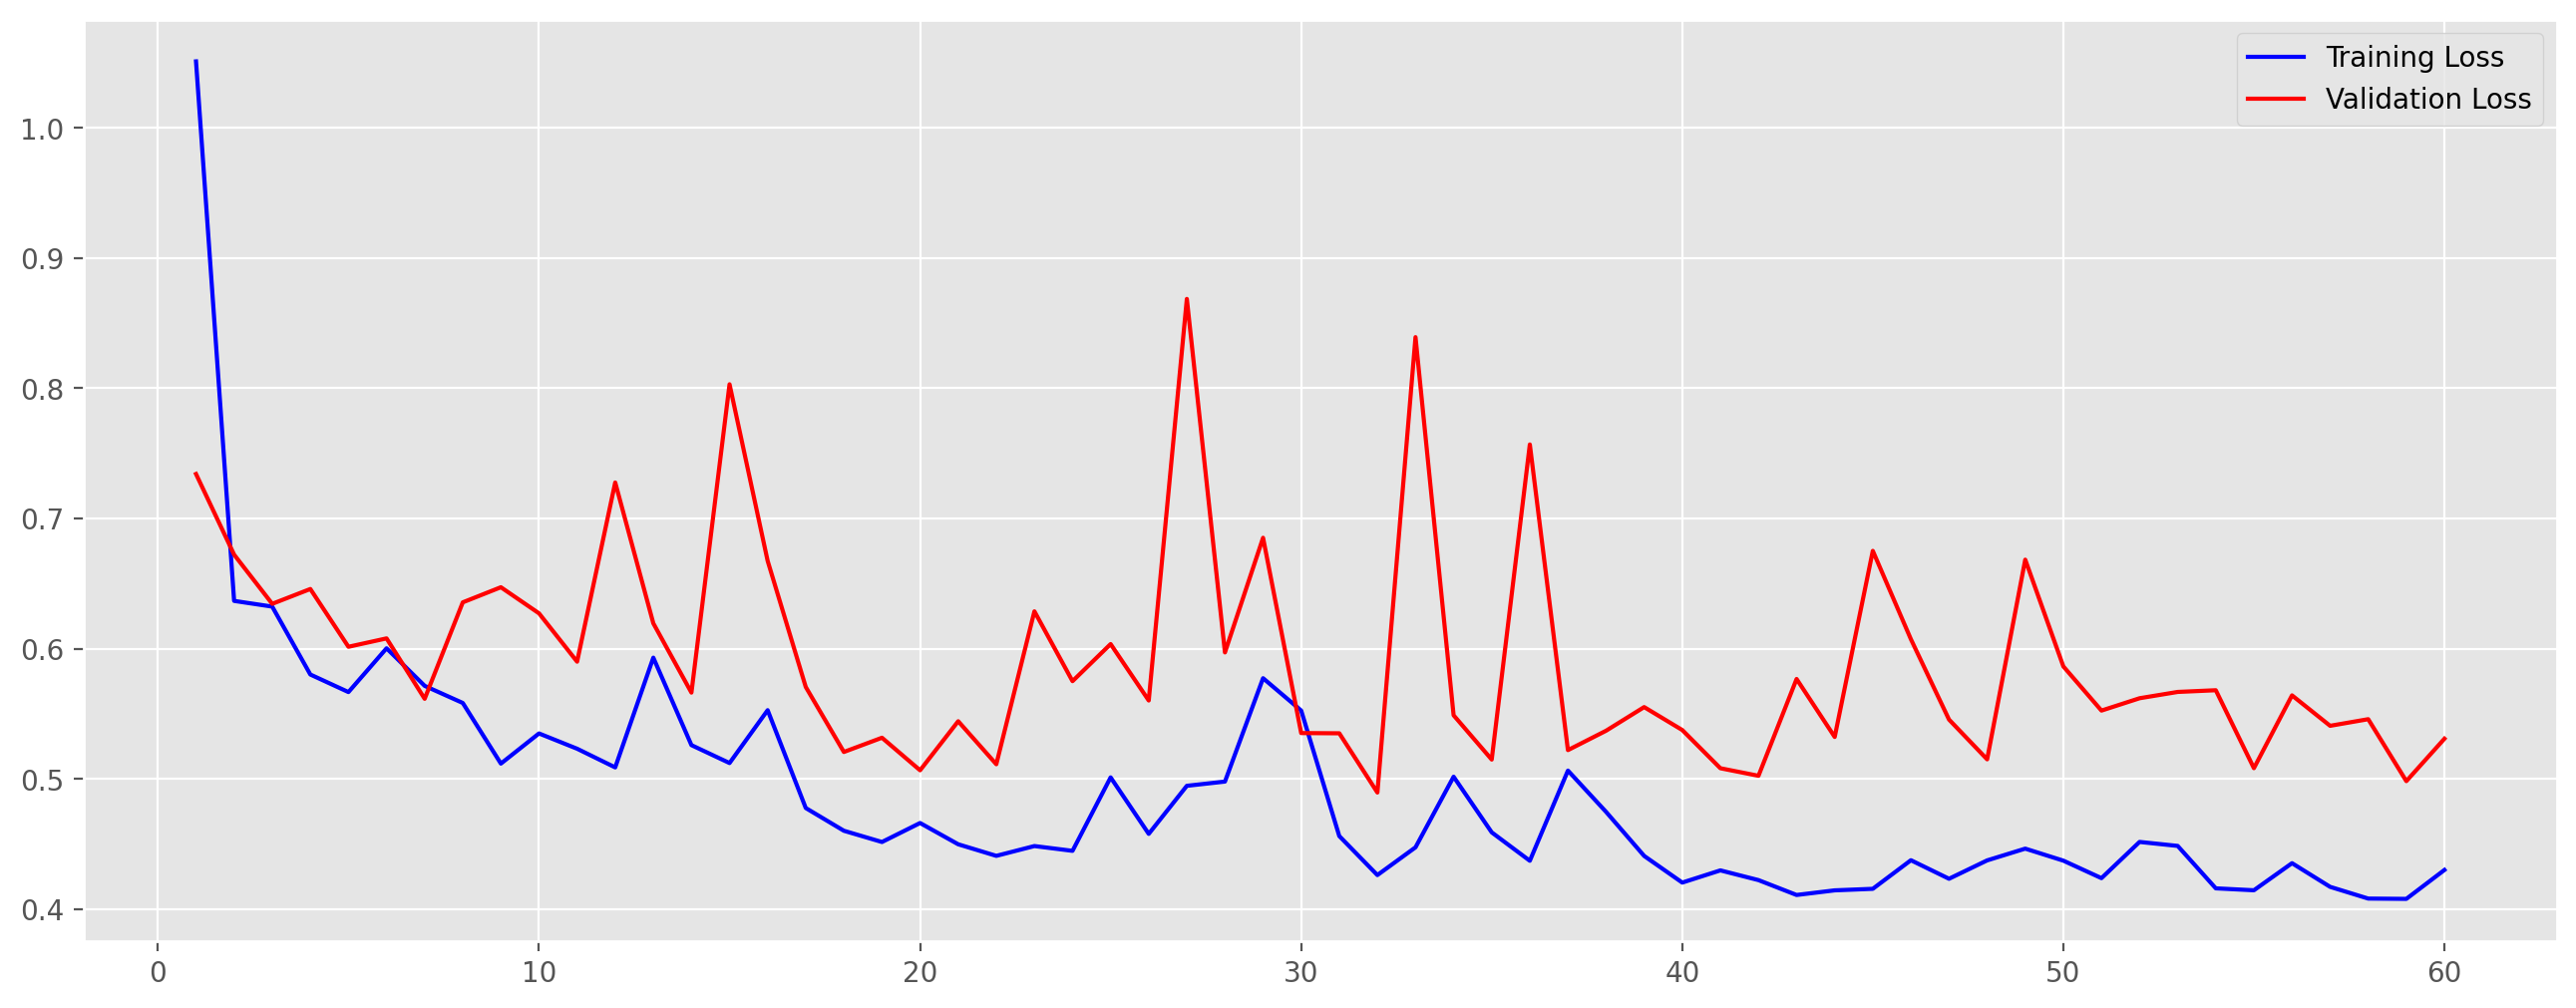

In [224]:
loss_train = history.history['loss']
loss_val   = history.history['val_loss']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

In [231]:
np.argmax(model.predict(x_test[0:1]), axis = 1)

1/1 [==============================] - 0s 23ms/step


array([0])